In [3]:
import pandas as pd #data processing
import matplotlib.pylab as plt
import numpy as np #linear algebra


In [6]:
df = pd.read_csv("C:/Users/antib/OneDrive/Documents/ML_Study/WA_Marketing-Campaign.csv")

In [5]:
import seaborn as sns

sns.set()

In [7]:
df.head(50)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [8]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


Text(0.5, 1.0, 'Percentage of sales across the different promotions')

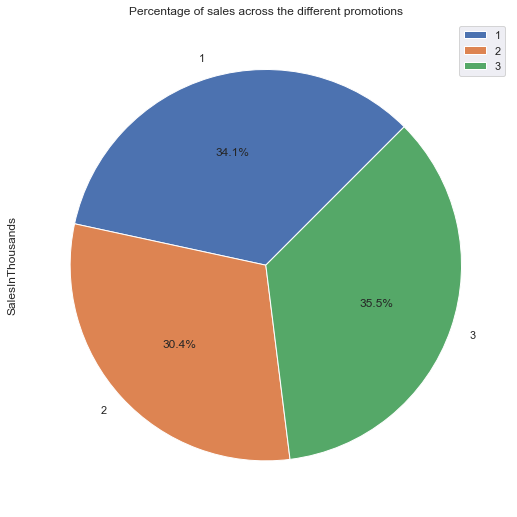

In [10]:
# percentage of sales across the different promotions

plt = df.groupby('Promotion').sum().plot(kind='pie', y='SalesInThousands', startangle=45, figsize=(9,9), autopct='%1.1f%%')
plt.set_title('Percentage of sales across the different promotions')

In [14]:
df2=df.groupby(['Promotion','MarketSize']).count()['MarketID']
#convert the series to dataframe and reset index
df2=pd.DataFrame(df2)
df2=df2.reset_index()
#rename the column
df2.rename(columns={'MarketID':"count"},inplace=True)

In [15]:
df2

,Promotion,MarketSize,count
0,1,Large,56
1,1,Medium,96
2,1,Small,20
3,2,Large,64
4,2,Medium,108
5,2,Small,16
6,3,Large,48
7,3,Medium,116
8,3,Small,24


Text(0.5, 1.0, 'market sizes across different promotions')

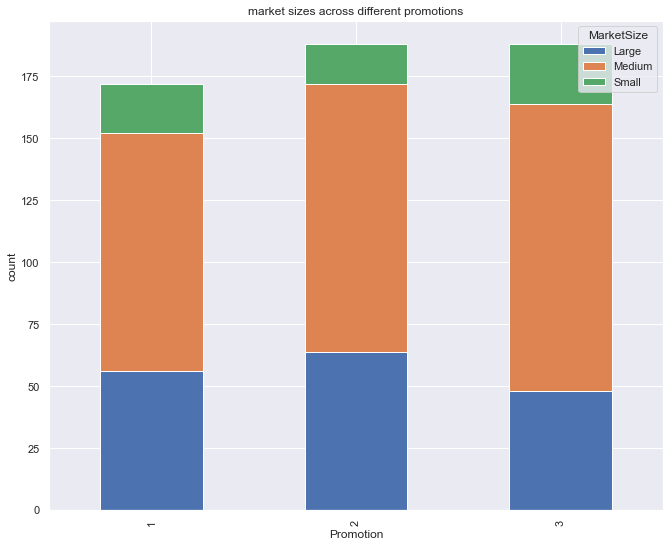

In [16]:
ax = (
    df.groupby(["Promotion","MarketSize"])
    .count()["MarketID"]
    .unstack("MarketSize")
    .plot(kind="bar",figsize=(11,9),stacked=True)
)
ax.set_ylabel("count")
ax.set_title("market sizes across different promotions")

<AxesSubplot:>

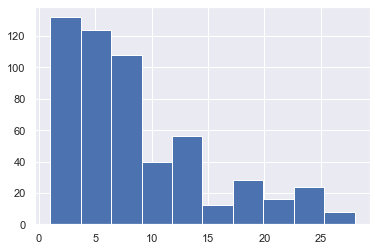

In [17]:
df["AgeOfStore"].hist()

In [19]:
#According to the figure above, a large proportion of stores are less than 10 years old.

Text(0.5, 1.0, 'promotions across age of stores')

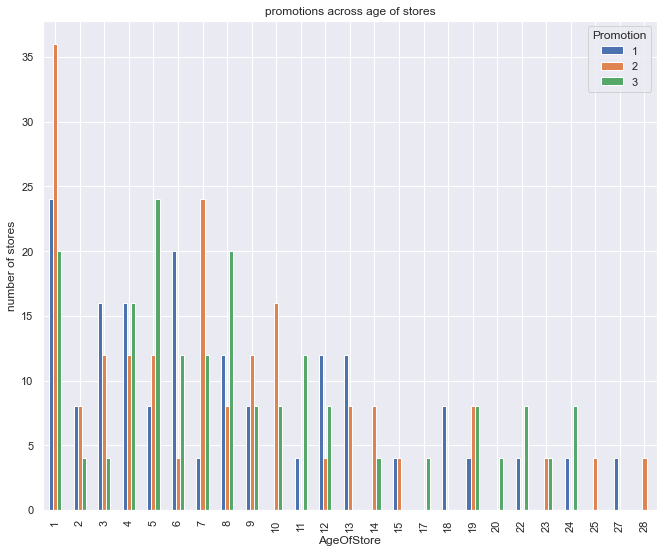

In [20]:
ax=(
   df.groupby(["AgeOfStore","Promotion"])
   .count()["MarketID"]
   .unstack("Promotion")
   .plot(kind="bar",figsize=(11,9))
)
ax.set_ylabel("number of stores")
ax.set_title("promotions across age of stores")

In [21]:
#A/B Testing

In [22]:
#Null Hypothesis: there is no statistically significant difference between the 2 types of promotions.

In [23]:
df.groupby("Promotion").describe()["SalesInThousands"]

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


In [25]:
from scipy import stats
from scipy.stats import ttest_ind

In [26]:
# comparing Promotion 1 and 2
promotion_1=df[df["Promotion"]==1]
promotion_2=df[df["Promotion"]==2]

p1_vs_p2 = ttest_ind(promotion_1["SalesInThousands"],promotion_2["SalesInThousands"])
print(p1_vs_p2)

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)


In [27]:
#p value is less than 0.05, which indicates we have enough evidence to reject the null hypothesis.  There is a statistical difference between the 2 promotion types.
#t-test results show that promotion 1 generates significantly higher sales than that of promotion 2.

In [28]:
#comparing Promotion 1 and 3
promotion_1=df[df["Promotion"]==1]
promotion_3=df[df["Promotion"]==3]

p1_vs_p3 = ttest_ind(promotion_1["SalesInThousands"],promotion_3["SalesInThousands"])
print(p1_vs_p3)

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313273)


In [29]:
#p value is greater than 0.05, which indicates we fail to reject the null hypothesis and there is no statistical difference between the 2 promotion types.

In [30]:
#comparing Promotion 2 and 3
promotion_2=df[df["Promotion"]==2]
promotion_3=df[df["Promotion"]==3]

p2_vs_p3 = ttest_ind(promotion_2["SalesInThousands"],promotion_3["SalesInThousands"])
print(p2_vs_p3)

Ttest_indResult(statistic=-4.88139271089348, pvalue=1.562894303627738e-06)


In [31]:
#p value is much less than 0.05, which indicates we have enough evidence to reject the null hypothesis.  There is a statistical difference between the 2 promotion types.
#t-test results show that promotion 3 generates significantly higher sales than that of promotion 2.